<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/visualise_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# download

In [16]:
!pip -q install timm
!git clone https://github.com/ShuweiShao/AF-SfMLearner.git
!git clone https://github.com/noahzn/Lite-Mono.git
!git clone https://github.com/ItsShi/MonoDepth.git

fatal: destination path 'AF-SfMLearner' already exists and is not an empty directory.
fatal: destination path 'Lite-Mono' already exists and is not an empty directory.
fatal: destination path 'MonoDepth' already exists and is not an empty directory.


In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1ZH-791JCdQETaS3LYvFNh0iuE39muqFg'
gdown.download(url,'monodepth_weights_147.zip',quiet=True)
!unzip -q monodepth_weights_147.zip

In [ ]:
# https://drive.google.com/file/d/1SoD421qKt_4A5OsyQxykHniQlDpTuCi_/view?usp=sharing
import gdown

url = 'https://drive.google.com/uc?id=1SoD421qKt_4A5OsyQxykHniQlDpTuCi_'
gdown.download(url,'SCARED_videos.zip',quiet=True)

!unzip -q SCARED_videos.zip

# https://drive.google.com/file/d/1kf7LjQ6a2ACKr6nX5Uyee3of3bXn1xWB/view
url = 'https://drive.google.com/uc?id=1kf7LjQ6a2ACKr6nX5Uyee3of3bXn1xWB'
gdown.download(url,'sfmLearner.zip',quiet=True)
!unzip -q sfmLearner.zip

In [ ]:
# https://drive.google.com/file/d/1GkXeOnSj8Izm_y6-8KNTLT7EidZgJ-xO/view?usp=sharing
import gdown

url = 'https://drive.google.com/uc?id=1GkXeOnSj8Izm_y6-8KNTLT7EidZgJ-xO'
gdown.download(url,'lite_weights_162.zip',quiet=True)
!unzip -q lite_weights_162.zip

In [ ]:
!pip install ffmpeg

video_name = "d3k4"
!ffmpeg -i /content/videos/{video_name}_rgb.mp4 -filter:v "crop=1280:1024:0:0" /content/videos/{video_name}_crop_rgb.mp4

!mkdir -p /content/frames/{video_name}
!ffmpeg -i /content/videos/{video_name}_crop_rgb.mp4 %6d.jpg
!mv *.jpg /content/frames/{video_name}

import PIL.Image as pil
im = pil.open("/content/frames/{}/000001.jpg".format(video_name))
print(im.size)

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=b09703f5a7652fe7e2546c9b37b8c2cd9f3ad6060692317f315178f7c416d6d6
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --e

In [ ]:
import gdown
import shutil
camera_url = 'https://drive.google.com/uc?id=1_G5h2CUXqdREPj8dB7DorVDQHxP4oLvF'
gdown.download(camera_url,'SCARED_camera.zip',quiet=True)
!unzip -q /content/SCARED_camera.zip
shutil.unpack_archive("SCARED_camera/{}_frame_data.tar.gz".format(video_name), "{}_json".format(video_name))

In [ ]:
def replace_text_in_file(search_path, replace_path, search_text, replace_text):
    with open(search_path, 'r') as file: content = file.read()
    for i in range(len(search_text)):
      modified_content = content.replace(search_text[i], replace_text[i])
      content = modified_content
    with open(replace_path, 'w') as file: file.write(modified_content)

In [ ]:
def modify_py(script_folder):
    search_text = ["odom_9", "load(pose_encoder_path)", "load(pose_decoder_path)", ".cuda()", "load(encoder_path)", "load(decoder_path)",
                  # "test_files_sequence2.txt",
                  # """gt_local_poses = np.load(gt_path, fix_imports=True, encoding='latin1')["data"]""",
                   "pred_poses = np.concatenate(pred_poses)",
                  ]
    replace_text = ["endovis", "load(pose_encoder_path, map_location='cpu')", "load(pose_decoder_path, map_location='cpu')",".cpu()", "load(encoder_path, map_location='cpu')", "load(decoder_path, map_location='cpu')",
                    # "{}_sequence.txt".format(video_name),
                    # """our_path = os.path.join(os.path.dirname(__file__), "splits", "endovis", "pose_our.npz")
        # np.savez_compressed(our_path, data=np.array(pred_poses))
        # return""",
                    """pred_poses = np.concatenate(pred_poses)
    np.savez_compressed(os.path.join(os.path.dirname(__file__), "splits", "endovis", "pose_our.npz"), data=np.array(pred_poses))""",
                    ]
    replace_text_in_file("{}/evaluate_pose.py".format(script_folder), "{}/evaluate_pose.py".format(script_folder), search_text, replace_text)
    replace_text_in_file("{}/test_simple.py".format(script_folder), "{}/test_simple.py".format(script_folder), search_text, replace_text)

    search_text = ["          folder,",
                  '  "image_02/data/frame_data"',
                   "gt_poses.npz",
                  '"test_files.txt"',
                  ]
    replace_text = ["          folder[0] + folder[7] + folder[9] + folder[-1] + '_json',",
                    '  # "image_02/data/frame_data"',
                    "gt_poses_sq2.npz",
                    '"test_files_sequence2.txt"'#'"{}_sequence.txt"'.format(video_name)
                    ]
    replace_text_in_file("{}/export_gt_pose.py".format(script_folder), "{}/export_gt_pose.py".format(script_folder), search_text, replace_text)

    replace_text_in_file("{}/visualize_pose.py".format(script_folder), "{}/visualize_pose.py".format(script_folder), ['"curve",', 'gca', "gt_poses.npz"], ['', 'add_subplot', "gt_poses_sq2.npz"])

    if script_folder == "Lite-Mono":
      search_path, replace_path = "{}/options.py".format(script_folder), "{}/options.py".format(script_folder)
      replace_text_in_file(search_path, replace_path, ['''choices=["eigen_zhou"''', '''choices=["kitti"''', "eigen"], ['''choices=["eigen_zhou", "endovis"''', '''choices=["kitti", "endovis"''', "endovis"])

      search_text = ["MonodepthOptions",
                    ]
      replace_text = ["LiteMonoOptions",
                      ]
      replace_text_in_file("{}/evaluate_pose.py".format(script_folder), "{}/evaluate_pose.py".format(script_folder), search_text, replace_text)

      search_text = ['''elif height == 320 and width == 1024:'''
                    ]

      replace_text = ['''elif (height == 320 and width == 1024) or (height == 256 and width == 320):'''
                    ]
      search_path, replace_path = "{}/networks/depth_encoder.py".format(script_folder), "{}/networks/depth_encoder.py".format(script_folder)
      replace_text_in_file(search_path, replace_path, search_text, replace_text)

# AF-SfM

In [18]:
script_folder = "AF-SfMLearner"  # "AF-SfMLearner" #"Lite-Mono"

!cp -r MonoDepth/datasets/ {script_folder}/

modify_py(script_folder)

Exporting ground truth depths for endovis
Saving to endovis
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
-> Computing pose predictions

   Trajectory error: 0.0509, std: 0.0291


   Rotation error: 0.0033, std: 0.0022

Figure(640x480)
cp: 'AF-SfMLearner/networks/pose_decoder.py' and 'AF-SfMLearner/networks/pose_decoder.py' are the same file
cp: 'AF-SfMLearner/networks/resnet_encoder.py' and 'AF-SfMLearner/networks/resnet_encoder.py' are the same file


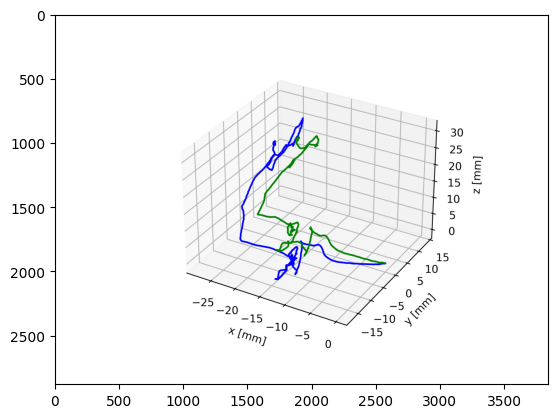

In [19]:
!python {script_folder}/export_gt_pose.py --split endovis --data_path /content/
!python {script_folder}/evaluate_pose.py --data_path frames/{video_name} --eval_split endovis --load_weights_folder Model_trained_end_to_end
!python {script_folder}/visualize_pose.py

!cp AF-SfMLearner/networks/pose_decoder.py {script_folder}/networks/pose_decoder.py
!cp AF-SfMLearner/networks/resnet_encoder.py {script_folder}/networks/resnet_encoder.py

# from google.colab import files
# files.download('vo.png')

import matplotlib.pyplot as plt
from PIL import Image
a = Image.open('vo.png')
plt.imshow(a)

In [ ]:
%cd /content/AF-SfMLearner

import os
import torch
import networks
import numpy as np

from torch.utils.data import DataLoader
from layers import transformation_from_parameters
from utils import readlines
from options import MonodepthOptions
from datasets import SCAREDRAWDataset

class MonodepthOptions_NB (MonodepthOptions):
    def parsenb(self):
        self.options = self.parser.parse_args([])
        return self.options

# from https://github.com/tinghuiz/SfMLearner
def dump_xyz(source_to_target_transformations):
    xyzs = []
    cam_to_world = np.eye(4)
    xyzs.append(cam_to_world[:3, 3])
    for source_to_target_transformation in source_to_target_transformations:
        cam_to_world = np.dot(cam_to_world, source_to_target_transformation)
        # cam_to_world = np.dot(source_to_target_transformation, cam_to_world)
        xyzs.append(cam_to_world[:3, 3])
    return xyzs


def dump_r(source_to_target_transformations):
    rs = []
    cam_to_world = np.eye(4)
    rs.append(cam_to_world[:3, :3])
    for source_to_target_transformation in source_to_target_transformations:
        cam_to_world = np.dot(cam_to_world, source_to_target_transformation)
        # cam_to_world = np.dot(source_to_target_transformation, cam_to_world)
        rs.append(cam_to_world[:3, :3])
    return rs


# from https://github.com/tinghuiz/SfMLearner
def compute_ate(gtruth_xyz, pred_xyz_o):

    # Make sure that the first matched frames align (no need for rotational alignment as
    # all the predicted/ground-truth snippets have been converted to use the same coordinate
    # system with the first frame of the snippet being the origin).
    offset = gtruth_xyz[0] - pred_xyz_o[0]
    pred_xyz = pred_xyz_o + offset[None, :]

    # Optimize the scaling factor
    scale = np.sum(gtruth_xyz * pred_xyz) / np.sum(pred_xyz ** 2)
    alignment_error = pred_xyz * scale - gtruth_xyz
    rmse = np.sqrt(np.sum(alignment_error ** 2)) / gtruth_xyz.shape[0]
    return rmse


def compute_re(gtruth_r, pred_r):
    RE = 0
    gt = gtruth_r
    pred = pred_r
    for gt_pose, pred_pose in zip(gt, pred):
        # Residual matrix to which we compute angle's sin and cos
        R = gt_pose @ np.linalg.inv(pred_pose)
        s = np.linalg.norm([R[0, 1] - R[1, 0],
                            R[1, 2] - R[2, 1],
                            R[0, 2] - R[2, 0]])
        c = np.trace(R) - 1
        # Note: we actually compute double of cos and sin, but arctan2 is invariant to scale
        RE += np.arctan2(s, c)

    return RE / gtruth_r.shape[0]


def evaluate(opt):
    """Evaluate odometry on the SCARED dataset
    """
    assert os.path.isdir(opt.load_weights_folder), \
        "Cannot find a folder at {}".format(opt.load_weights_folder)

    filenames = readlines(
        os.path.join(os.path.dirname(__file__), "splits", "endovis",
                     "test_files_sequence2.txt"))

    dataset = SCAREDRAWDataset(opt.data_path, filenames, opt.height, opt.width,
                               [0, 1], 4, is_train=False)
    dataloader = DataLoader(dataset, opt.batch_size, shuffle=False,
                            num_workers=opt.num_workers, pin_memory=True, drop_last=False)

    pose_encoder_path = os.path.join(opt.load_weights_folder, "pose_encoder.pth")
    pose_decoder_path = os.path.join(opt.load_weights_folder, "pose.pth")

    pose_encoder = networks.ResnetEncoder(opt.num_layers, False, 2)
    pose_encoder.load_state_dict(torch.load(pose_encoder_path, map_location='cpu'))

    pose_decoder = networks.PoseDecoder(pose_encoder.num_ch_enc, 1, 2)
    pose_decoder.load_state_dict(torch.load(pose_decoder_path, map_location='cpu'))

    pose_encoder.cpu()
    pose_encoder.eval()
    pose_decoder.cpu()
    pose_decoder.eval()

    pred_poses = []

    print("-> Computing pose predictions")

    opt.frame_ids = [0, 1]  # pose network only takes two frames as input

    with torch.no_grad():
        for inputs in dataloader:
            for key, ipt in inputs.items():
                inputs[key] = ipt.cpu()

            all_color_aug = torch.cat([inputs[("color", 1, 0)], inputs[("color", 0, 0)]], 1)

            features = [pose_encoder(all_color_aug)]
            axisangle, translation = pose_decoder(features)

            pred_poses.append(
                transformation_from_parameters(axisangle[:, 0], translation[:, 0]).cpu().numpy())

    pred_poses = np.concatenate(pred_poses)
    np.savez_compressed(os.path.join(os.path.dirname(__file__), "splits", "endovis", "pose_our.npz"), data=np.array(pred_poses))

    gt_path = os.path.join(os.path.dirname(__file__), "splits", "endovis", "gt_poses_sq2.npz")
    gt_local_poses = np.load(gt_path, fix_imports=True, encoding='latin1')["data"]

    ates = []
    res = []
    num_frames = gt_local_poses.shape[0]
    track_length = 5
    for i in range(0, num_frames - 1):
        local_xyzs = np.array(dump_xyz(pred_poses[i:i + track_length - 1]))
        gt_local_xyzs = np.array(dump_xyz(gt_local_poses[i:i + track_length - 1]))
        local_rs = np.array(dump_r(pred_poses[i:i + track_length - 1]))
        gt_rs = np.array(dump_r(gt_local_poses[i:i + track_length - 1]))

        ates.append(compute_ate(gt_local_xyzs, local_xyzs))
        res.append(compute_re(local_rs, gt_rs))

    print("\n   Trajectory error: {:0.4f}, std: {:0.4f}\n".format(np.mean(ates), np.std(ates)))
    print("\n   Rotation error: {:0.4f}, std: {:0.4f}\n".format(np.mean(res), np.std(res)))


if __name__ == "__main__":
    options = MonodepthOptions_NB()
    evaluate(options.parsenb())

%cd ../

# LiteMono

In [ ]:
# !rm -r Lite-Mono
# !git clone https://github.com/noahzn/Lite-Mono.git

In [ ]:
script_folder = "Lite-Mono"  # "AF-SfMLearner" #"Lite-Mono"

!mkdir Lite-Mono/splits/endovis/
!cp AF-SfMLearner/evaluate_pose.py {script_folder}/evaluate_pose.py
!cp AF-SfMLearner/export_gt_pose.py {script_folder}/export_gt_pose.py
!cp AF-SfMLearner/visualize_pose.py {script_folder}/visualize_pose.py

!cp AF-SfMLearner/splits/endovis/test_files_sequence2.txt {script_folder}/splits/endovis/

!cp -r MonoDepth/datasets/ {script_folder}/

modify_py(script_folder)

Exporting ground truth depths for endovis
Saving to endovis
-> Computing pose predictions

   Trajectory error: 0.1034, std: 0.0613


   Rotation error: 0.0071, std: 0.0020

Figure(640x480)


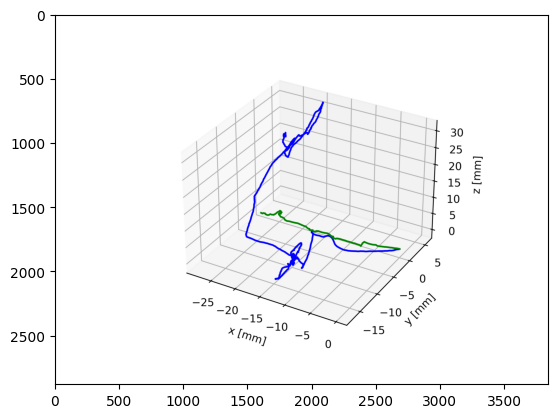

In [17]:
!python {script_folder}/export_gt_pose.py --split endovis --data_path /content/
!python {script_folder}/evaluate_pose.py --data_path frames/{video_name} --eval_split endovis --load_weights_folder weights_162 --num_workers 2
!python {script_folder}/visualize_pose.py
# from google.colab import files
# files.download('vo.png')

import matplotlib.pyplot as plt
from PIL import Image
a = Image.open('vo.png')
plt.imshow(a)

# monodepth2

In [20]:
!rm -r MonoDepth
!git clone https://github.com/ItsShi/MonoDepth.git

Cloning into 'MonoDepth'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 264 (delta 95), reused 108 (delta 56), pack-reused 84
Receiving objects: 100% (264/264), 10.53 MiB | 31.08 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [21]:
script_folder = "MonoDepth"  # "AF-SfMLearner" #"Lite-Mono"

!cp AF-SfMLearner/evaluate_pose.py {script_folder}/evaluate_pose.py
!cp AF-SfMLearner/export_gt_pose.py {script_folder}/export_gt_pose.py
!cp AF-SfMLearner/visualize_pose.py {script_folder}/visualize_pose.py

!cp AF-SfMLearner/splits/endovis/test_files_sequence2.txt {script_folder}/splits/endovis/

modify_py(script_folder)

In [ ]:
!python {script_folder}/export_gt_pose.py --split endovis --data_path /content/
!python {script_folder}/evaluate_pose.py --data_path frames/{video_name} --eval_split endovis --load_weights_folder weights_147
!python {script_folder}/visualize_pose.py

# from google.colab import files
# files.download('vo.png')

import matplotlib.pyplot as plt
from PIL import Image
a = Image.open('vo.png')
plt.imshow(a)

Exporting ground truth depths for endovis
Saving to endovis
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
-> Computing pose predictions
